In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics

In [2]:
book_movie_imdb = pd.read_csv('book_movie_imdb.csv')

In [6]:
book_movie_imdb.describe().round(2)

book_rating  book_year_published  num_critic_for_reviews  duration  \
count       404.00               403.00                  403.00    404.00   
mean          3.94              1968.92                  194.26    120.69   
std           0.23                92.87                  129.48     27.30   
min           3.21               536.00                    2.00     30.00   
25%           3.81              1967.00                   98.00    103.75   
50%           3.95              1992.00                  162.00    116.00   
75%           4.09              2002.00                  262.50    134.00   
max           4.56              2015.00                  676.00    240.00   

       director_facebook_likes  actor_3_facebook_likes  \
count                   396.00                  404.00   
mean                   1367.27                 1064.58   
std                    4155.64                 2591.68   
min                       0.00                    0.00   
25%                      17.75                  190.50   
50%                      97.50                  426.00   
75%                     353.00                  694.50   
max                   22000.00                19000.00   

       actor_1_facebook_likes         gross  num_voted_users  \
count                  404.00  3.700000e+02           404.00   
mean                  9064.17  6.809704e+07        152275.68   
std                  10711.32  7.630748e+07        191274.72   
min                      5.00  2.874000e+03            29.00   
25%                    845.50  1.611952e+07         34404.00   
50%                   3000.00  4.214892e+07         86164.00   
75%                  15000.00  8.301939e+07        179437.00   
max                  87000.00  4.079993e+08       1347461.00   

       cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  \
count                     404.00                403.00                403.00   
mean                    13910.75                  1.11                457.04   
std                     16770.76                  1.64                489.06   
min                         5.00                  0.00                  3.00   
25%                      2071.00                  0.00                150.00   
50%                      5723.50                  1.00                269.00   
75%                     20051.00                  2.00                551.50   
max                    120797.00                 15.00               2968.00   

             budget  title_year  actor_2_facebook_likes  imdb_score  \
count  3.820000e+02      396.00                  404.00      404.00   
mean   7.593124e+07     2000.60                 2826.65        6.97   
std    6.244250e+08       14.84                 5227.96        0.93   
min    1.000000e+04     1932.00                    0.00        3.10   
25%    1.400000e+07     1997.00                  441.75        6.40   
50%    2.900000e+07     2005.00                  744.00        7.10   
75%    5.775000e+07     2010.00                 1000.00        7.70   
max    1.221550e+10     2016.00                29000.00        9.20   

       aspect_ratio  movie_facebook_likes  
count        401.00                404.00  
mean           2.16              16122.42  
std            0.75              28348.57  
min            1.33                  0.00  
25%            1.85                  0.00  
50%            2.35                849.50  
75%            2.35              20000.00  
max           16.00             190000.00

In [8]:
#Let's examine the initial relationship between our variables
book_movie_imdb.corr()

book_rating  book_year_published  \
book_rating                   1.000000             0.075388   
book_year_published           0.075388             1.000000   
num_critic_for_reviews        0.064707             0.067124   
duration                      0.195587            -0.038442   
director_facebook_likes       0.072749             0.014878   
actor_3_facebook_likes        0.091388            -0.009693   
actor_1_facebook_likes        0.097077            -0.037549   
gross                         0.259402            -0.025876   
num_voted_users               0.288738             0.074175   
cast_total_facebook_likes     0.114981            -0.054484   
facenumber_in_poster          0.009217            -0.001048   
num_user_for_reviews          0.160529             0.041860   
budget                       -0.016854             0.010451   
title_year                   -0.148047             0.092618   
actor_2_facebook_likes        0.087058            -0.109267   
imdb_score                    0.411315             0.014540   
aspect_ratio                  0.023385             0.021271   
movie_facebook_likes          0.146920             0.104304   

                           num_critic_for_reviews  duration  \
book_rating                              0.064707  0.195587   
book_year_published                      0.067124 -0.038442   
num_critic_for_reviews                   1.000000  0.190685   
duration                                 0.190685  1.000000   
director_facebook_likes                  0.265986  0.216022   
actor_3_facebook_likes                   0.214191  0.053165   
actor_1_facebook_likes                   0.310122  0.057561   
gross                                    0.441045  0.276561   
num_voted_users                          0.535640  0.347378   
cast_total_facebook_likes                0.326648  0.064990   
facenumber_in_poster                    -0.048890 -0.017924   
num_user_for_reviews                     0.555490  0.389864   
budget                                   0.098659 -0.005762   
title_year                               0.397242 -0.096289   
actor_2_facebook_likes                   0.274150  0.044648   
imdb_score                               0.225781  0.323430   
aspect_ratio                             0.037899 -0.052389   
movie_facebook_likes                     0.661328  0.153697   

                           director_facebook_likes  actor_3_facebook_likes  \
book_rating                               0.072749                0.091388   
book_year_published                       0.014878               -0.009693   
num_critic_for_reviews                    0.265986                0.214191   
duration                                  0.216022                0.053165   
director_facebook_likes                   1.000000                0.164313   
actor_3_facebook_likes                    0.164313                1.000000   
actor_1_facebook_likes                    0.169004                0.429999   
gross                                     0.259208                0.284611   
num_voted_users                           0.356676                0.168798   
cast_total_facebook_likes                 0.203146                0.689219   
facenumber_in_poster                     -0.053787                0.066083   
num_user_for_reviews                      0.225507                0.195255   
budget                                    0.006879                0.000337   
title_year                               -0.003925                0.136831   
actor_2_facebook_likes                    0.211381                0.639649   
imdb_score                                0.191922               -0.015568   
aspect_ratio                             -0.006243                0.006304   
movie_facebook_likes                      0.157302                0.072760   

                           actor_1_facebook_likes     gross  num_voted_users  \
book_rating                              0.097077  0.259402         

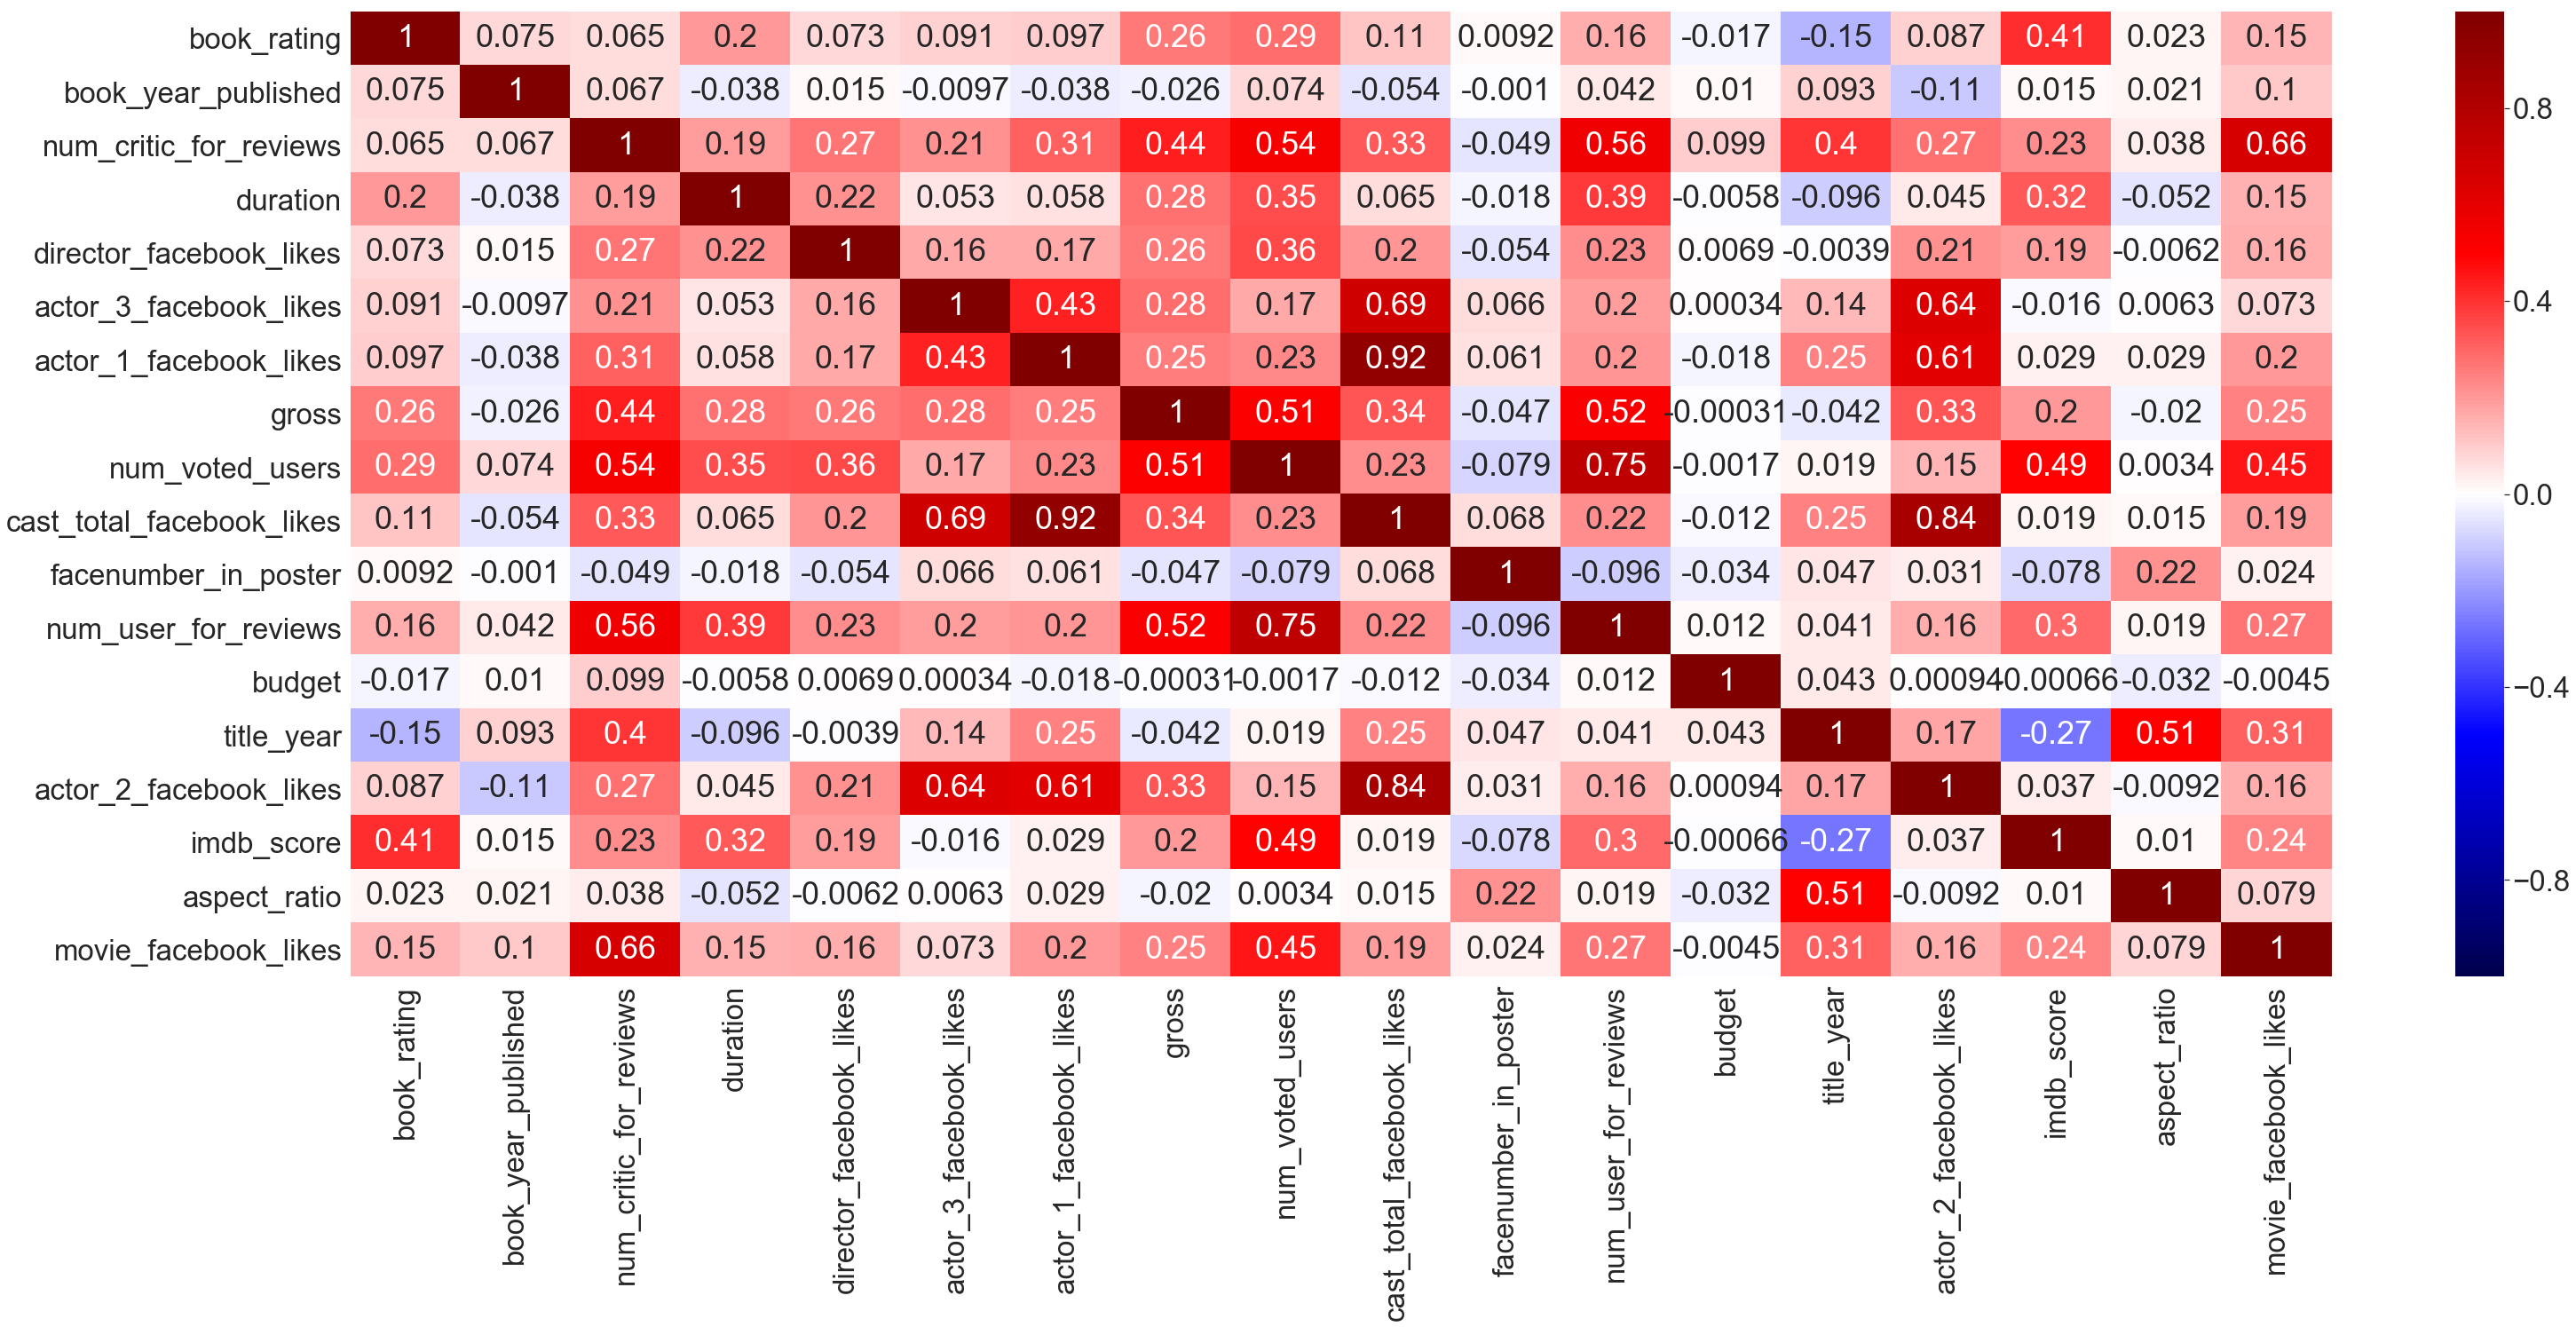

In [9]:
sns.set(font_scale=3) 
plt.figure(figsize=(50,20))
sns.heatmap(book_movie_imdb.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


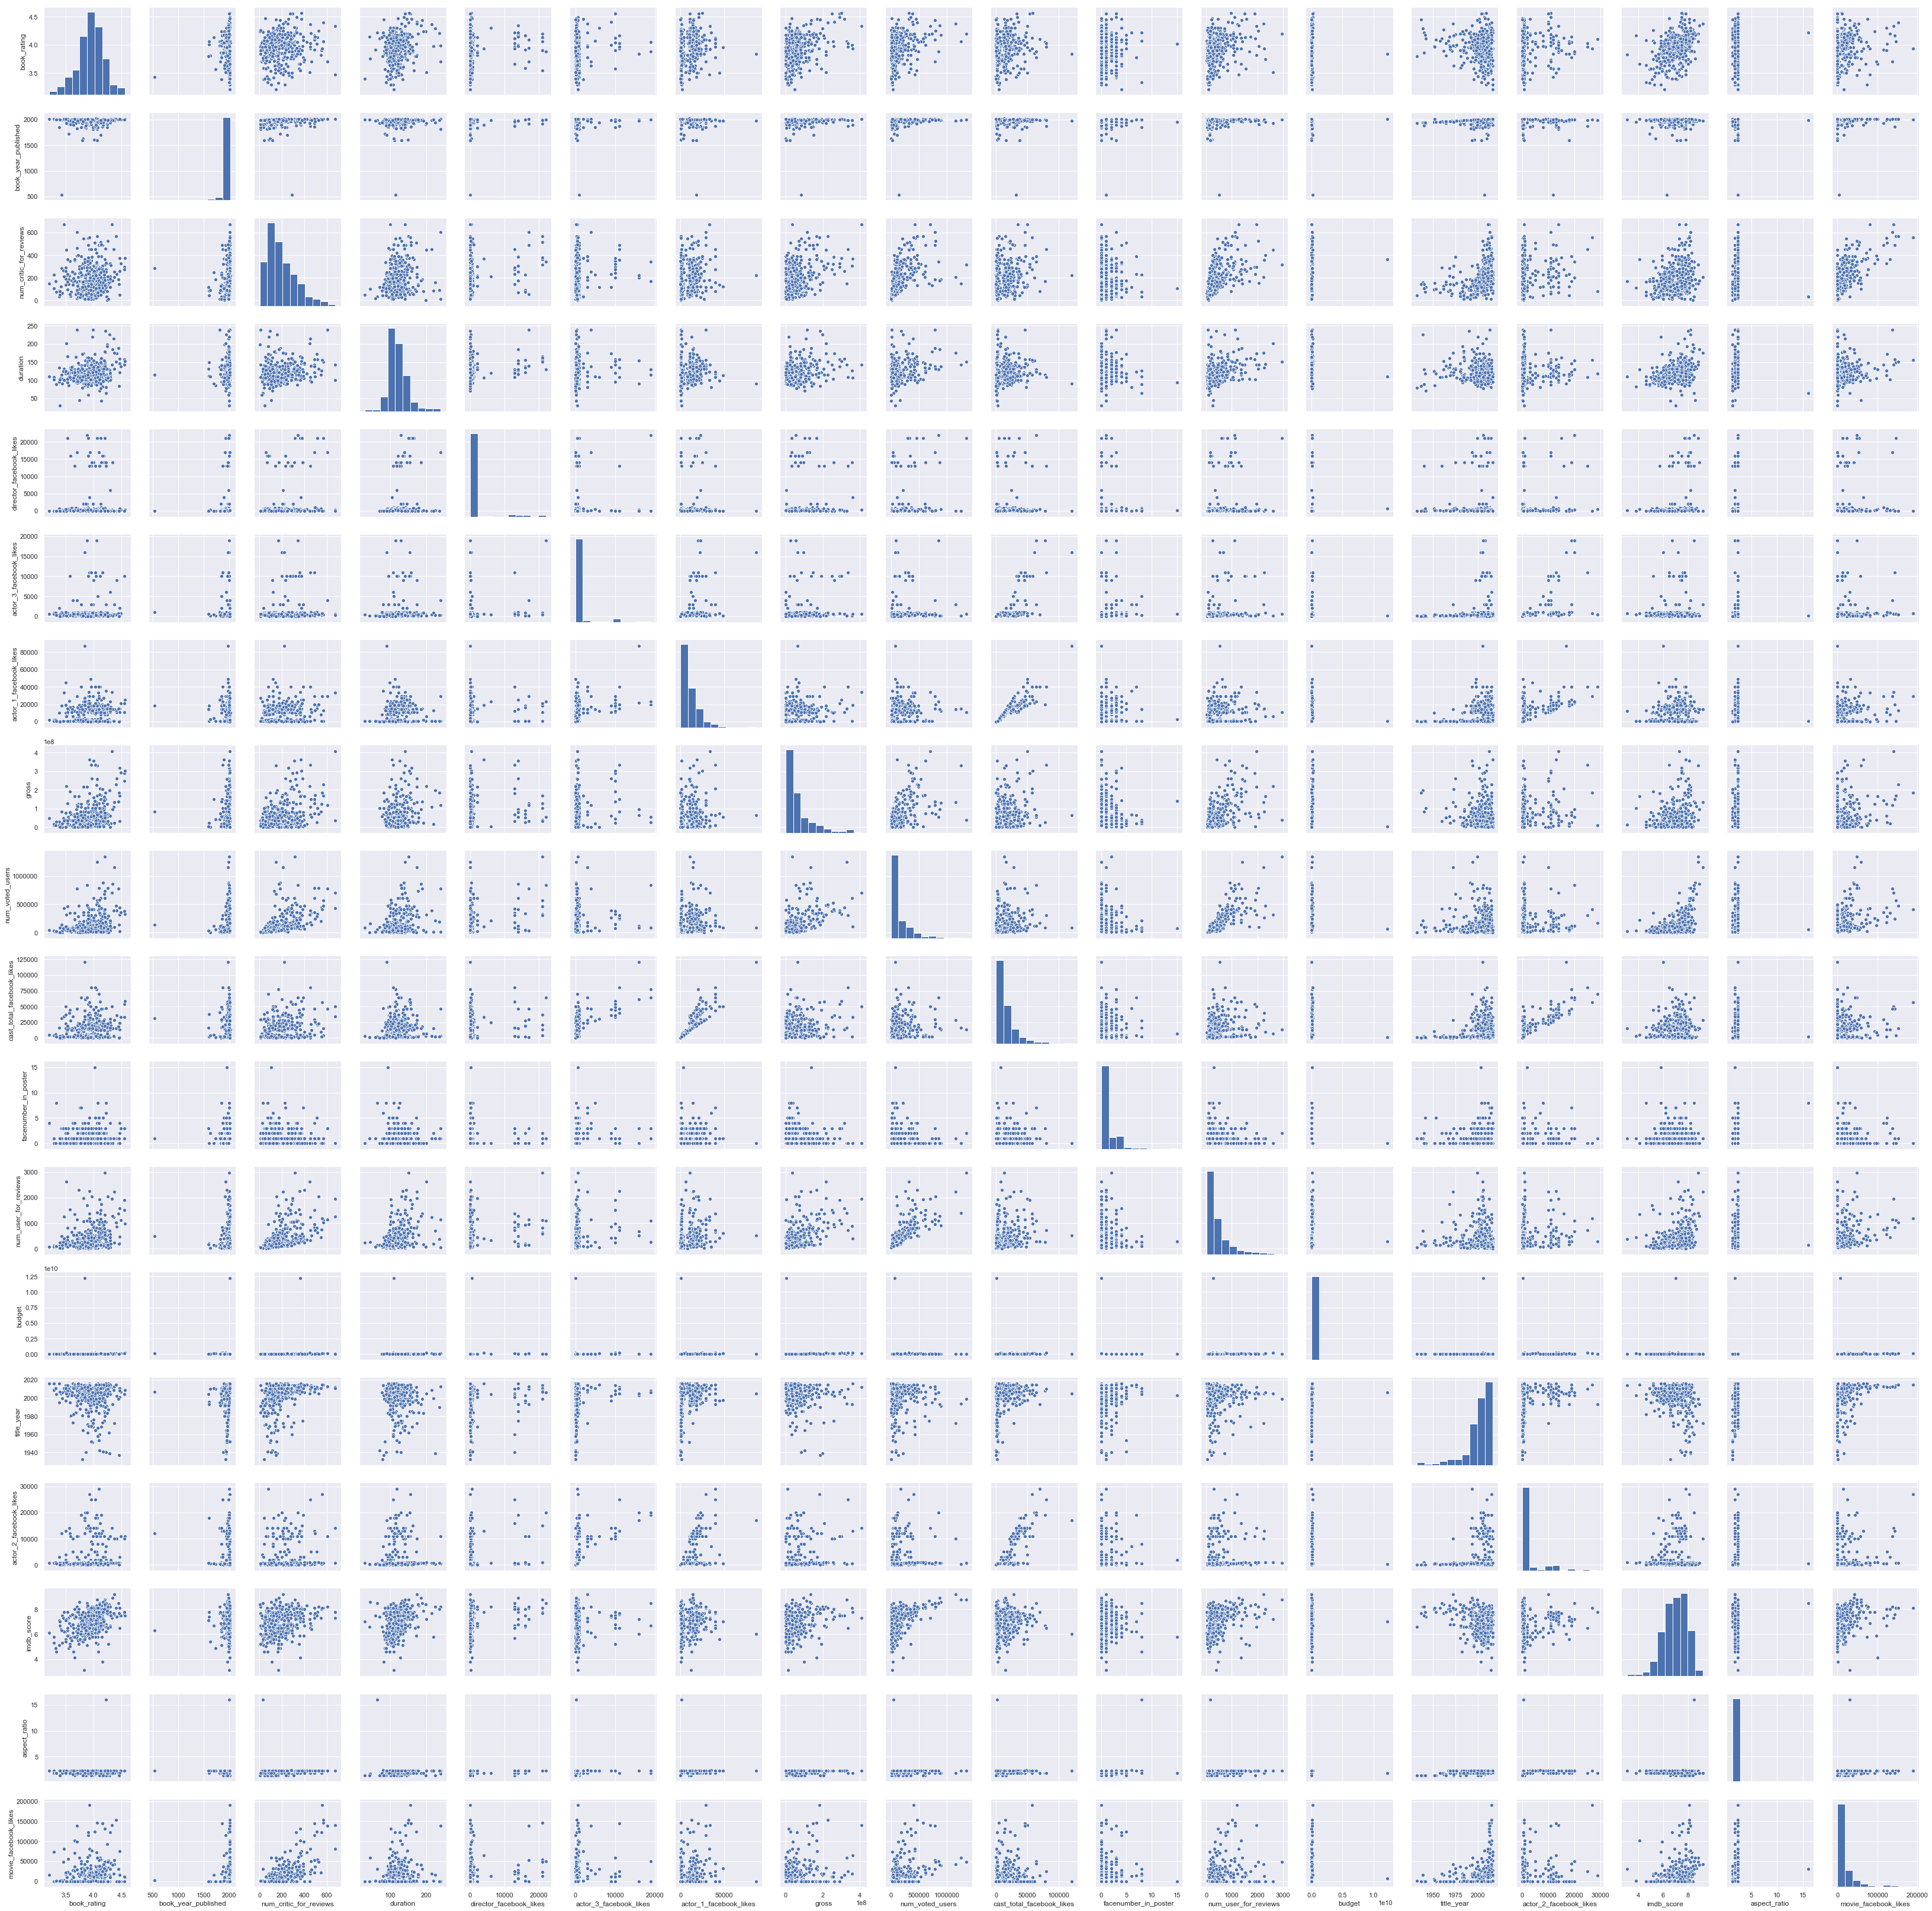

In [10]:
#Examine the histrograms:
sns.set(font_scale=1) 
sns.pairplot(book_movie_imdb);

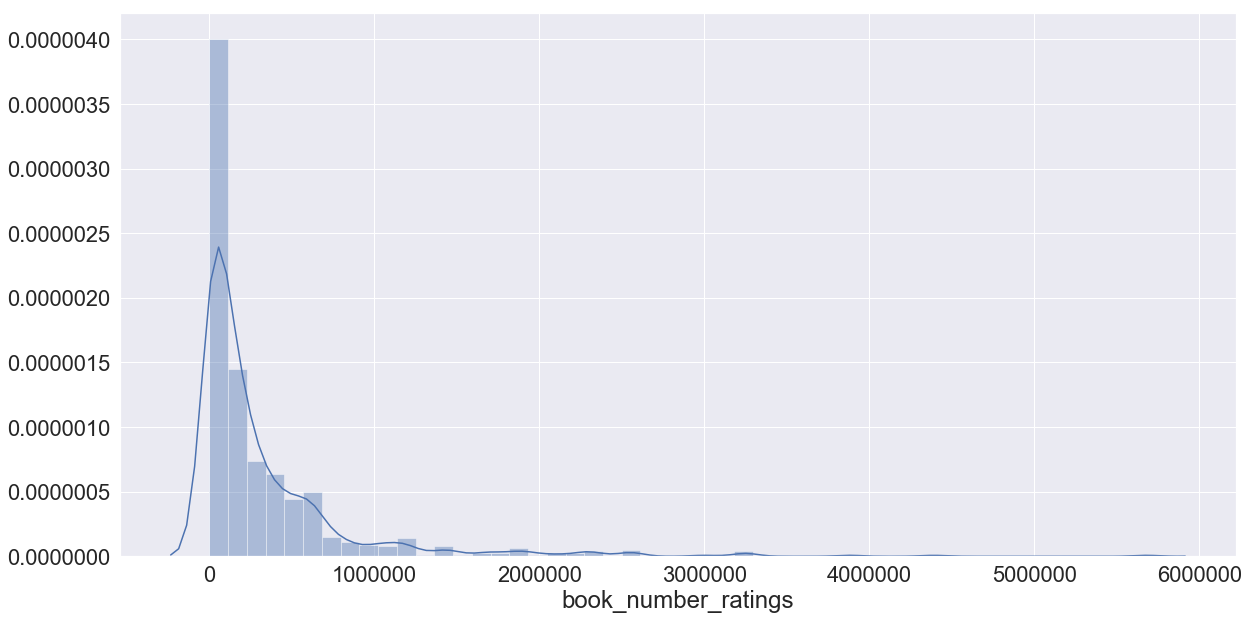

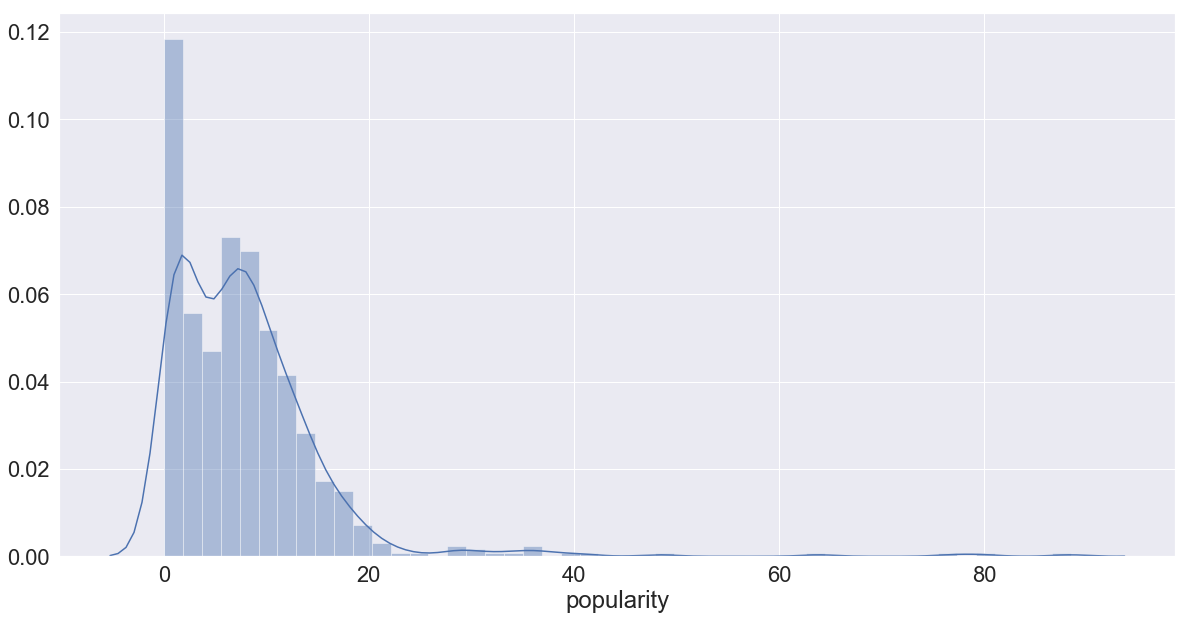

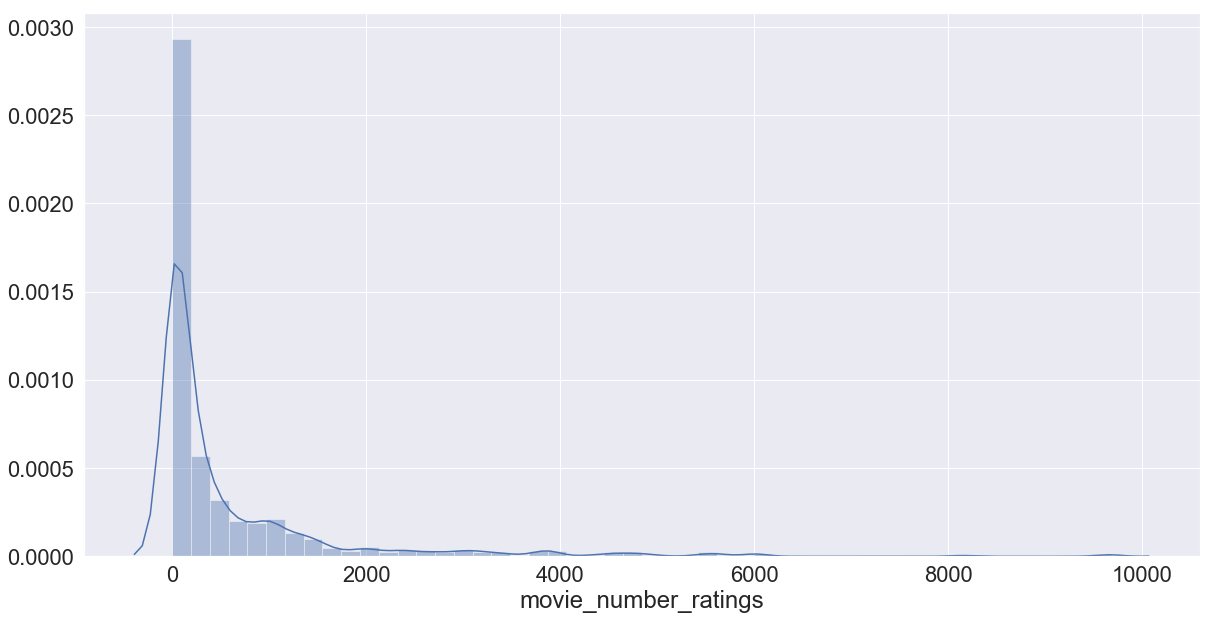

In [8]:
#These features appear heavily skewed:
#book_number_ratings
#movie_number_ratings
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.distplot(book_movie['book_number_ratings'])

plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.distplot(book_movie['popularity'])

plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.distplot(book_movie['movie_number_ratings'])

#They are good candidates for a log transformation

In [9]:
#Applying the log transformation to those features:

book_movie['popularity_log'] = np.log(book_movie['popularity'])
book_movie['book_number_ratings_log'] = np.log(book_movie['book_number_ratings'])
book_movie['movie_number_ratings_log'] = np.log(book_movie['movie_number_ratings'])

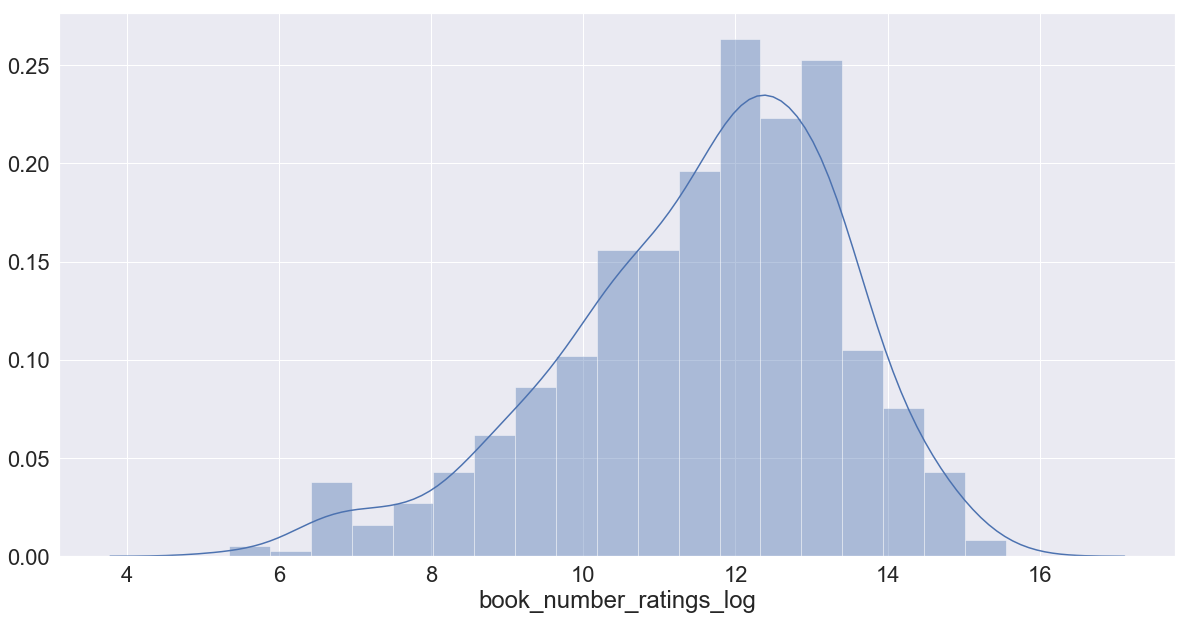

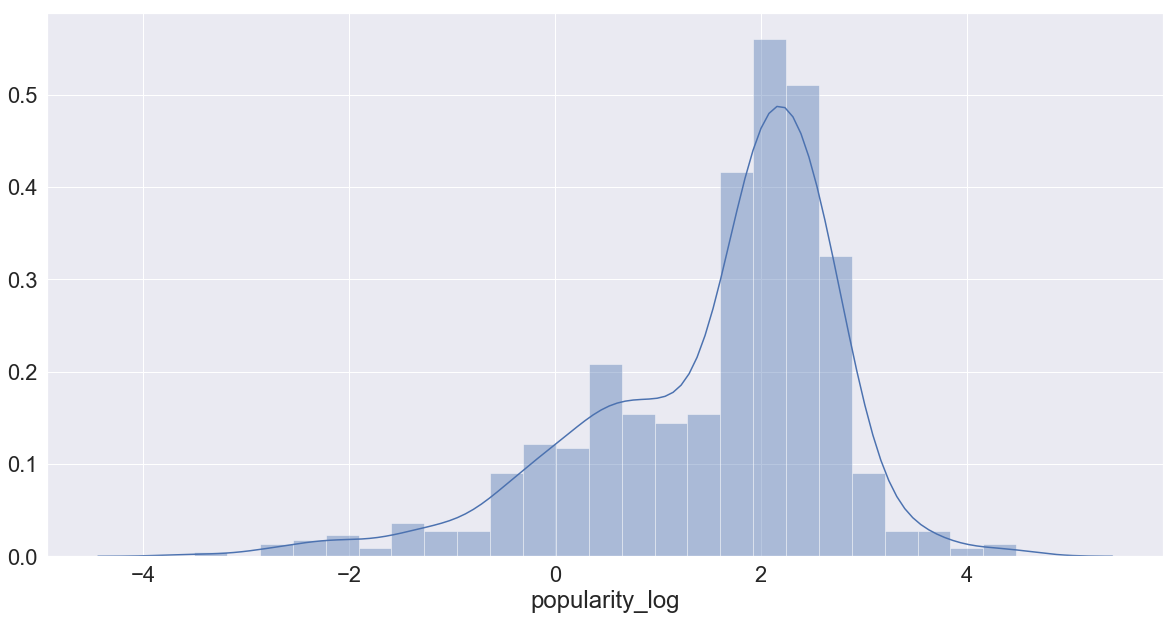

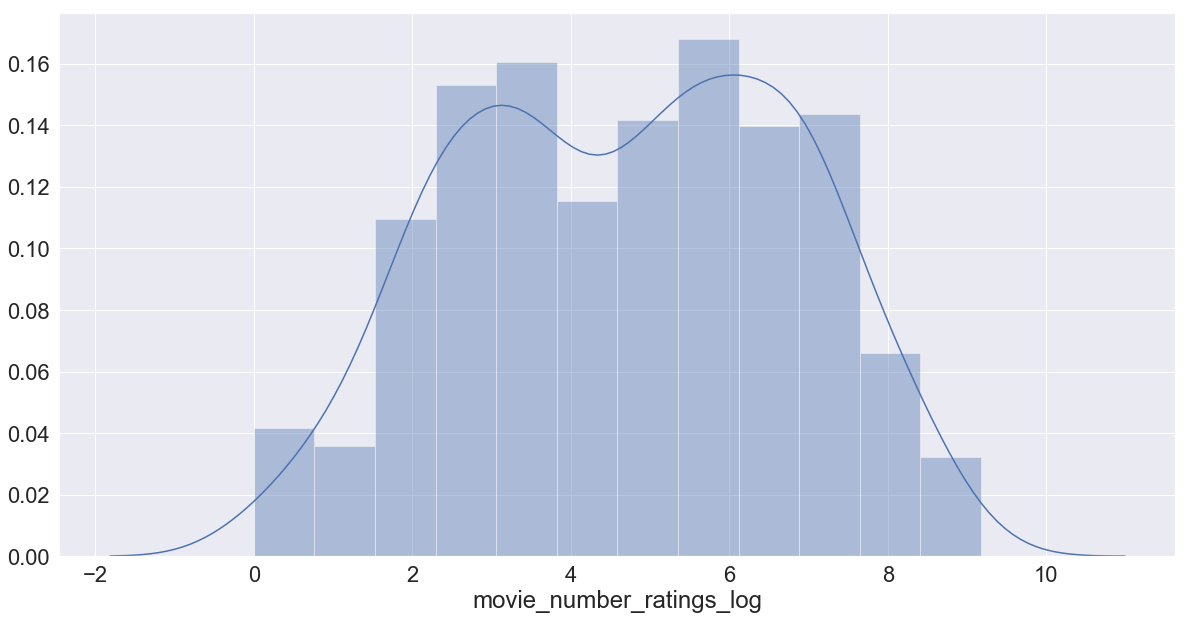

In [10]:
#Now let's plot them again to see the difference:

plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.distplot(book_movie['book_number_ratings_log'])

plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.distplot(book_movie['popularity_log'])

plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.distplot(book_movie['movie_number_ratings_log'])

#The results are not perfect but they are closer to a normal distribution than before.

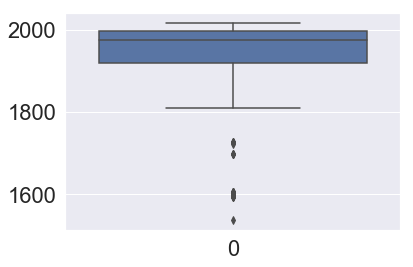

In [11]:
#Looking at the year the book was published, there are a few noticeable outliers:

sns.boxplot(data = book_movie['book_year_published'])

In [12]:
date_list = np.array(book_movie['book_year_published'])
q25,q50,q75 = np.percentile(date_list, [25,50,75])
iqr = q75 - q25
minimum = q25 - 1.5*(iqr)
maximum = q75 + 1.5*(iqr)
print(minimum.round(2), q25, q50, q75, maximum.round(2))
print([x for x in book_movie['book_year_published'] if x > maximum])
print([x for x in book_movie['book_year_published'] if x < minimum])

1803.62 1920.25 1975.5 1998.0 2114.62
[]
[1536, 1593, 1593, 1593, 1595, 1595, 1595, 1595, 1595, 1596, 1598, 1598, 1599, 1599, 1599, 1600, 1600, 1600, 1600, 1600, 1600, 1603, 1603, 1603, 1603, 1603, 1603, 1605, 1605, 1606, 1606, 1606, 1606, 1697, 1697, 1697, 1697, 1722, 1726, 1726, 1726, 1726]


In [13]:
#There are a few years where a book was published quite early, before movies even existed, so there are noticeable outliers.
#Let's set these outliers to the max values in the dataset to remove those early values:

book_movie.loc[book_movie.book_year_published < minimum, 'book_year_published'] = np.nan
book_movie.fillna(minimum, inplace = True)

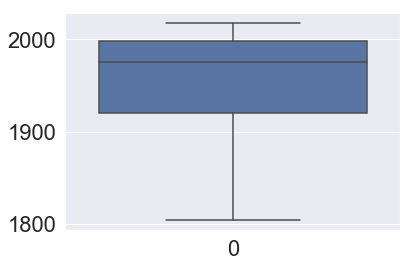

In [14]:
sns.boxplot(data = book_movie['book_year_published'])

In [15]:
book_movie['book_year_publish_or'] = book_movie['book_year_published']

In [16]:
book_movie = book_movie.drop(columns = ['popularity', 'book_number_ratings', 'movie_number_ratings', 'book_year_published'])

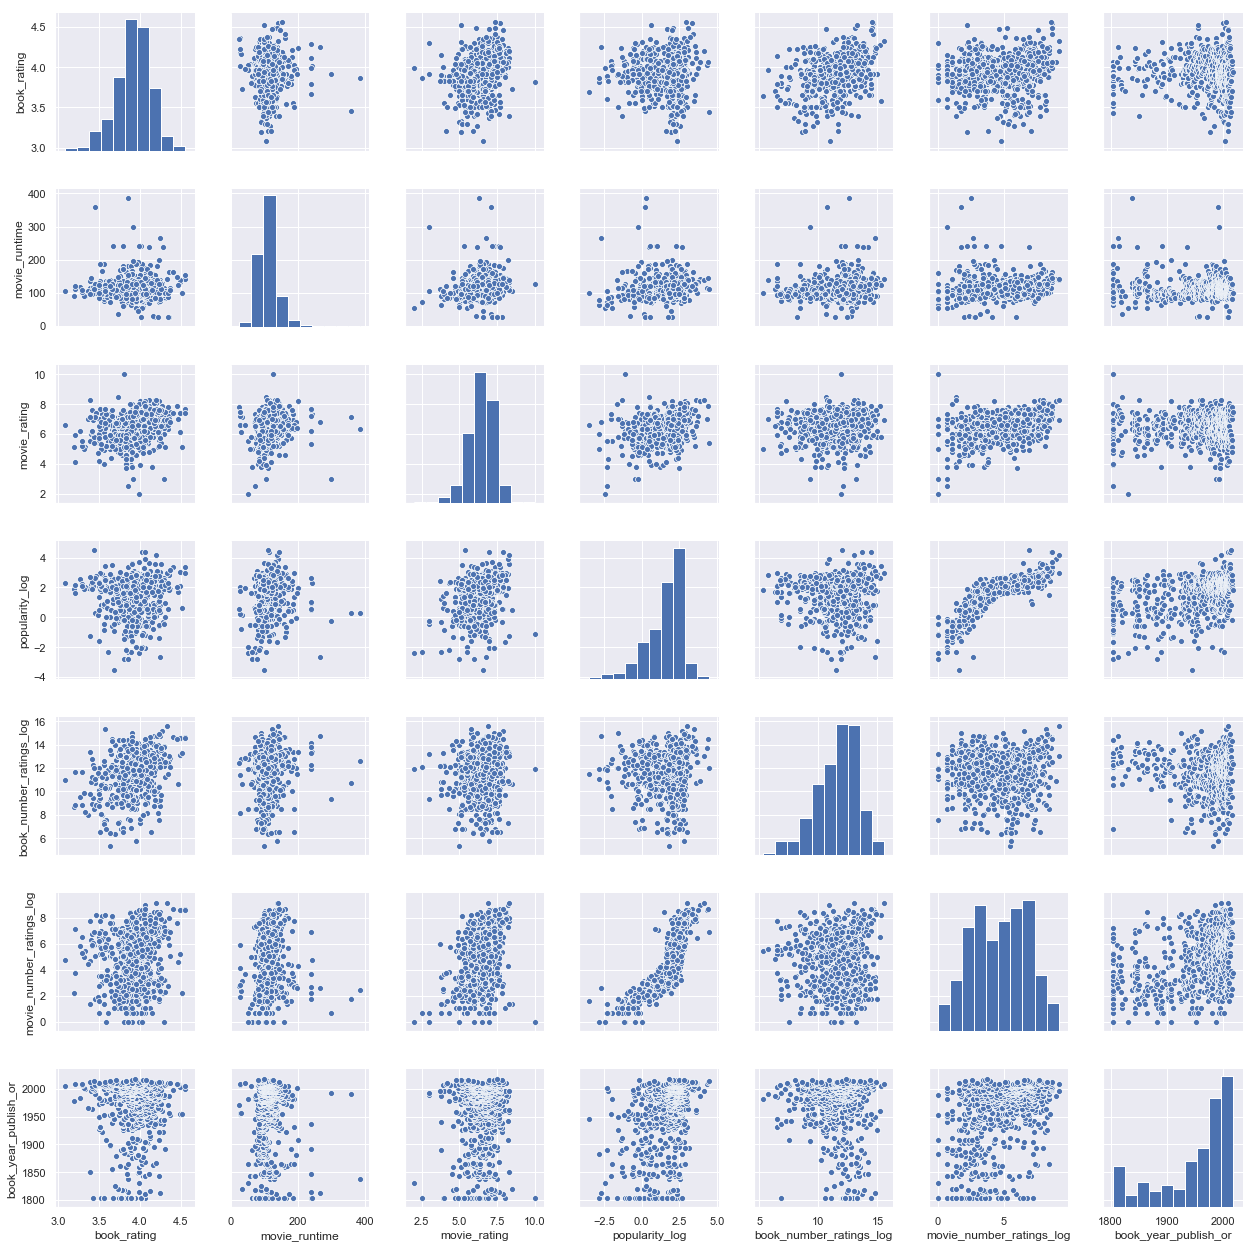

In [17]:
#Now that the features have been transformed, let's examine the pairplot again:
sns.set(font_scale=1) 
sns.pairplot(book_movie)

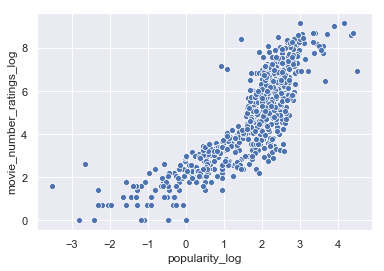

In [18]:
#It looks like the popularity_log and movie_number_ratings_log are candidates for a polynomial tranformation

sns.scatterplot(x = book_movie['popularity_log'], y = book_movie['movie_number_ratings_log'])

In [19]:
book_movie['popularity_log'] = book_movie['popularity_log']**2

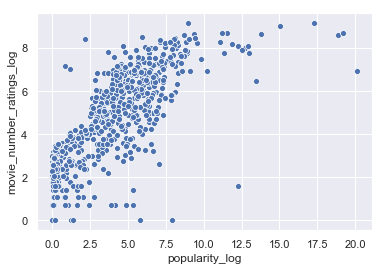

In [20]:
sns.scatterplot(x = book_movie['popularity_log'], y = book_movie['movie_number_ratings_log'])

In [131]:
book_movie = pd.read_csv('book_movie.csv')

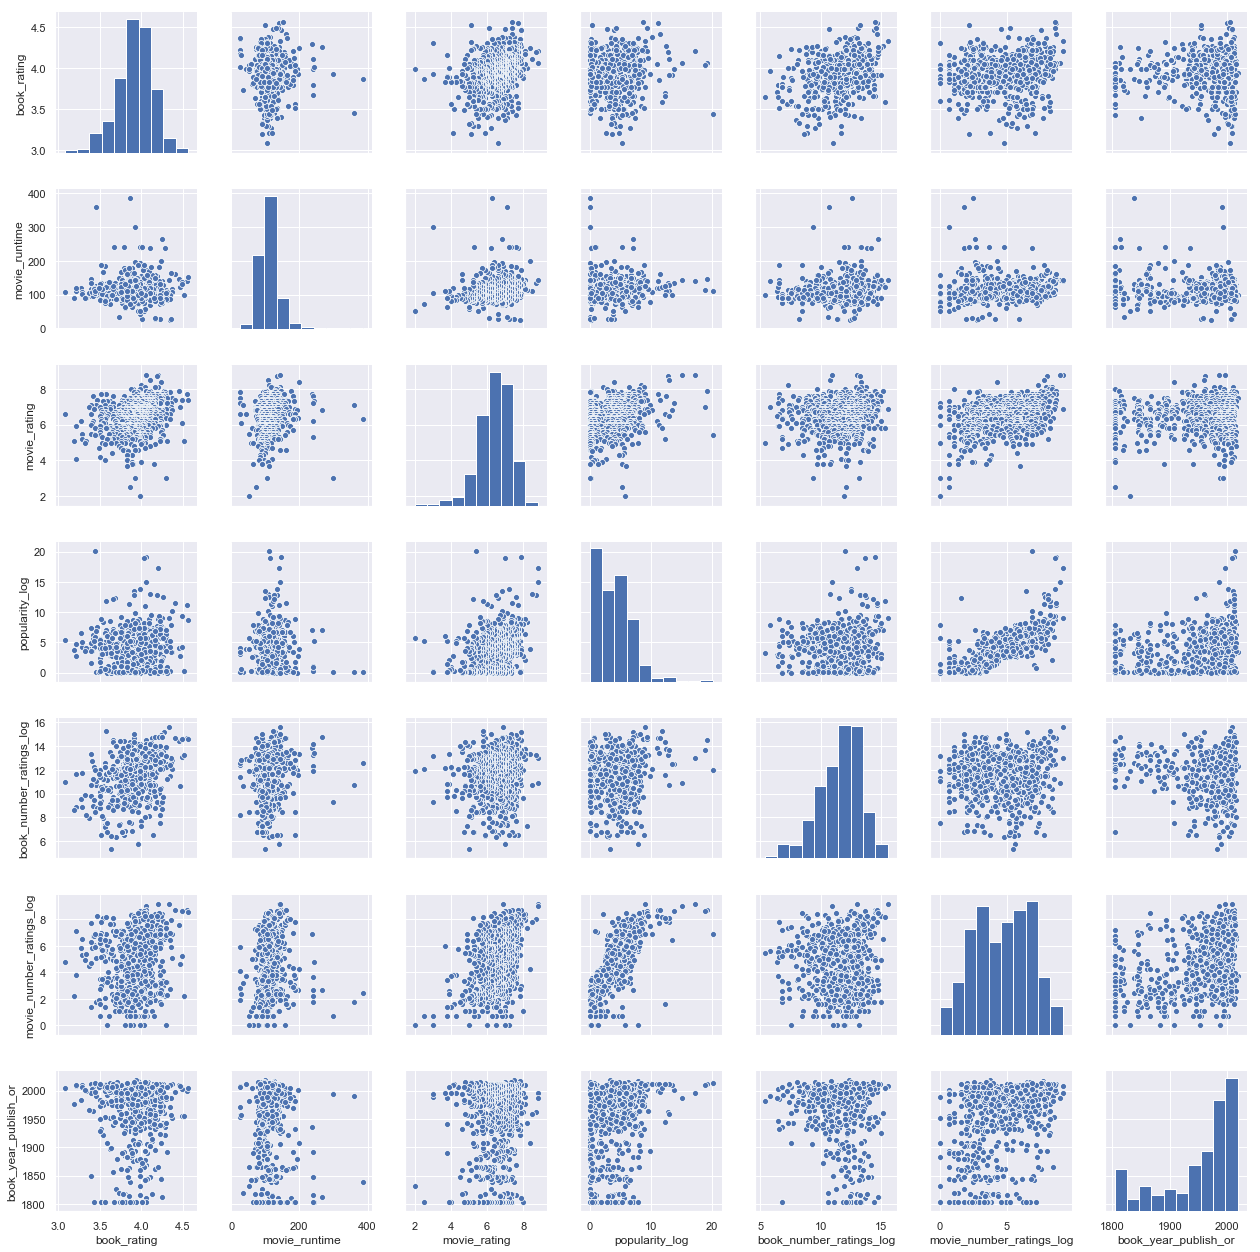

In [132]:
sns.pairplot(book_movie)

#After all the feature transformations are completed.

In [11]:
book_movie_imdb.columns

Index(['book_title', 'book_rating', 'book_number_rating',
       'book_year_published', 'color', 'director_name',
       'num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

In [19]:
#Using the patsy matrix, examine the relationship between just the book rating and the movie rating.

# Create our feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('imdb_score ~ book_rating', data=book_movie_imdb, return_type="dataframe")

# Create the model
model = sm.OLS(y1, X1)

# Fit the model to the training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()


#Not surprisingly, the Adj. R2 is very low but the p-value for the book rating is significant. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     81.86
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           6.33e-18
Time:                        15:52:44   Log-Likelihood:                -508.10
No. Observations:                 404   AIC:                             1020.
Df Residuals:                     402   BIC:                             1028.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4761      0.719      0.662      0.508      -0.938       1.891
book_rating     1.6491      0.182      9.048      0.000       1.291       2.007
==============================================================================
Omnibus:                       47.357   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.592
Skew:                          -0.744   Prob(JB):                     3.85e-17
Kurtosis:                       4.510   Cond. No.                         71.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
book_movie.describe()

book_rating  movie_runtime  movie_rating  popularity_log  \
count   692.000000     692.000000    692.000000      692.000000   
mean      3.923150     112.614162      6.429624        3.896933   
std       0.221697      32.189606      0.893134        3.041629   
min       3.080000      25.000000      2.000000        0.000000   
25%       3.800000      95.000000      5.900000        1.131773   
50%       3.940000     107.500000      6.500000        3.865600   
75%       4.070000     125.000000      7.000000        5.686397   
max       4.560000     386.000000      8.800000       20.091232   

       book_number_ratings_log  movie_number_ratings_log  book_year_publish_or  
count               692.000000                692.000000            692.000000  
mean                 11.574346                  4.701049           1949.182442  
std                   1.820360                  2.109893             63.611774  
min                   5.342334                  0.000000           1803.625000  
25%                  10.446858                  2.995732           1920.250000  
50%                  11.929014                  4.879000           1975.500000  
75%                  12.907129                  6.454777           1998.000000  
max                  15.552562                  9.177611           2018.000000

In [135]:
#Using the patsy matrix, let's repeat the analysis for all the features:

# Create our feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('movie_rating ~ movie_runtime + book_rating + popularity_log + book_number_ratings_log + movie_number_ratings_log + book_year_publish_or', data=book_movie, return_type="dataframe")

# Create the model
model = sm.OLS(y, X)

# Fit the model to the training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()


#Not surprisingly, the Adj. R2 is very low but the p-value for the book rating is significant. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           movie_rating   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     39.48
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           2.64e-41
Time:                        15:13:20   Log-Likelihood:                -800.43
No. Observations:                 692   AIC:                             1615.
Df Residuals:                     685   BIC:                             1647.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    5.8542      1.180      4.962      0.000       3.538       8.171
movie_runtime                0.0032      0.001      3.472      0.001       0.001       0.005
book_rating                  1.0221      0.141      7.232      0.000       0.745       1.300
popularity_log              -0.0084      0.015     -0.578      0.563      -0.037       0.020
book_number_ratings_log     -0.0361      0.018     -2.029      0.043      -0.071      -0.001
movie_number_ratings_log     0.1965      0.022      8.851      0.000       0.153       0.240
book_year_publish_or        -0.0022      0.001     -4.115      0.000      -0.003      -0.001
==============================================================================
Omnibus:                       66.355   Durbin-Watson:                   0.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.073
Skew:                          -0.658   Prob(JB):                     5.62e-24
Kurtosis:                       4.409   Cond. No.                     7.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals')

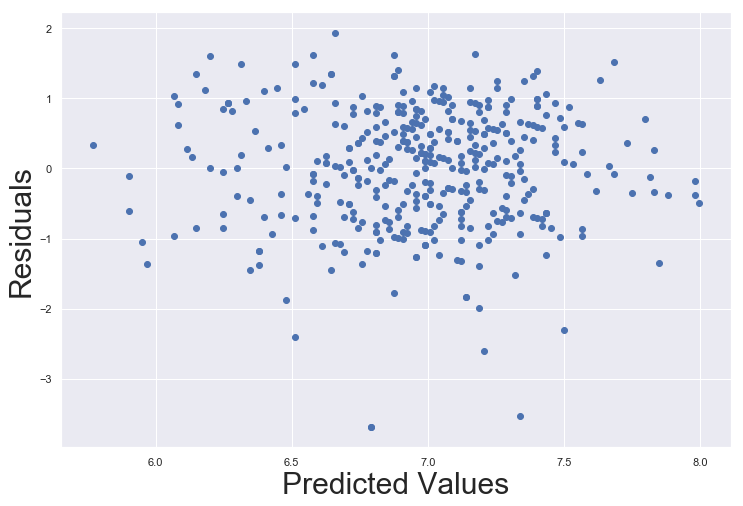

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(fit.predict(), fit.resid);
plt.xlabel('Predicted Values', size = 30)
plt.ylabel('Residuals', size = 30)

```
standard scaler
coeff will change but model will remain the same
before doing this, split into training, validation and testing
then do regularization to choose features to take and to keep, split into training, validation, and testing set.
turn into a better model
worsens R2 in sample but then makes a better general model.
```

In [27]:
#Splitting the data into training, validation, and testing (60-20-20)

In [20]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [21]:
X_train.columns

Index(['Intercept', 'book_rating'], dtype='object')

In [22]:
#Scaling the features 

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_ridge = Ridge(alpha = 1)

In [23]:
X_train_scaled.shape

(242, 2)

In [24]:
X_val_scaled.shape

(81, 2)

In [25]:
X_test_scaled.shape

(81, 2)

In [26]:
lm_ridge.fit(X_train_scaled, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
lm_ridge.score(X_val_scaled, y_val)

0.06843075797428066

In [28]:
lm_ridge.fit(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
lm_ridge.score(X_test_scaled, y_test)

-54.2160167148362

In [30]:
y_predict = lm_ridge.predict(X_test_scaled)

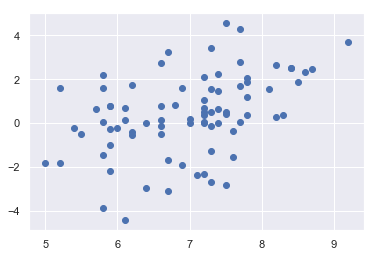

In [31]:
plt.scatter(x = y_test, y = y_predict)

In [32]:
coeffs = lm_ridge.coef_
intercept =  lm_ridge.intercept_
# print the coefficients
print(intercept)
print(coeffs)

[0.75976797]
[[0.         1.57715278]]


In [33]:
np.sqrt(metrics.mean_squared_error(y_test, y_predict))

6.772934017569857

In [151]:
X_test_scaled.shape

(139, 7)

In [152]:
y_test.shape

(139, 1)

In [153]:
log_resid.shape

(139, 1)

In [34]:
#import scipy.stats as stats
residuals = lm_ridge.predict(X_test_scaled) - y_test
#stats.probplot(log_resid, dist='norm', plot = plt)
#plt.show()

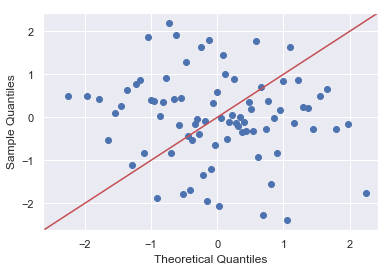

In [35]:
fig = sm.qqplot(residuals, stats.t, fit = True, line = '45')
plt.show()

In [36]:
book_movie_imdb.sort_values(by = 'book_rating', ascending = False).head(5)

book_title  book_rating  \
7       Harry Potter and the Half-Blood Prince         4.56   
2          Harry Potter and the Goblet of Fire         4.55   
8     Harry Potter and the Prisoner of Azkaban         4.55   
9    Harry Potter and the Order of the Phoenix         4.49   
370                                  Fireproof         4.47   

    book_number_rating  book_year_published  color   director_name  \
7            2,071,765               2005.0  Color     David Yates   
2            2,169,268               2000.0  Color     Mike Newell   
8            2,317,552               1999.0  Color  Alfonso Cuarón   
9            2,123,629               2003.0  Color     David Yates   
370             42,088               2008.0  Color   Alex Kendrick   

     num_critic_for_reviews  duration  director_facebook_likes  \
7                     375.0     153.0                    282.0   
2                     295.0     157.0                    179.0   
8                     274.0     142.0                      0.0   
9                     329.0     138.0                    282.0   
370                    50.0     122.0                    589.0   

     actor_3_facebook_likes  ... num_user_for_reviews  language  country  \
7                   10000.0  ...                973.0   English       UK   
2                   10000.0  ...               1896.0   English       UK   
8                   10000.0  ...               1504.0   English       UK   
9                     687.0  ...               1108.0   English       UK   
370                   150.0  ...                215.0   English      USA   

    content_rating       budget title_year  actor_2_facebook_likes  \
7               PG  250000000.0     2009.0                 11000.0   
2            PG-13  150000000.0     2005.0                 11000.0   
8               PG  130000000.0     2004.0                 10000.0   
9            PG-13  150000000.0     2007.0                 11000.0   
370             PG     500000.0     2008.0                   153.0   

     imdb_score aspect_ratio  movie_facebook_likes  
7           7.5         2.35                 10000  
2           7.6         2.35                     0  
8           7.8         2.35                 11000  
9           7.5         2.35                     0  
370         6.5         1.85                     0  

[5 rows x 32 columns]

In [39]:
book_movie_imdb.sort_values(by = 'imdb_score', ascending = False).head(10)

book_title  book_rating book_number_rating  \
90                     The Godfather         4.37            294,621   
163                 Schindler's List         4.34            121,475   
146                     Forrest Gump         4.06             55,182   
65                        Fight Club         4.20            434,993   
73   One Flew Over the Cuckoo's Nest         4.19            557,526   
104         The Silence of the Lambs         4.17            403,988   
248                         Hannibal         3.75             73,296   
182                        Outlander         4.22            701,268   
97                    The Green Mile         4.44            218,681   
192                           Psycho         4.11             46,128   

     book_year_published             color         director_name  \
90                1969.0             Color  Francis Ford Coppola   
163               1982.0   Black and White      Steven Spielberg   
146               1986.0   Black and White       Robert Zemeckis   
65                1996.0             Color         David Fincher   
73                1962.0             Color          Milos Forman   
104               1988.0             Color        Jonathan Demme   
248               1999.0             Color                   NaN   
182               1991.0             Color                   NaN   
97                1996.0             Color        Frank Darabont   
192               1959.0   Black and White      Alfred Hitchcock   

     num_critic_for_reviews  duration  director_facebook_likes  \
90                    208.0     175.0                      0.0   
163                   174.0     185.0                  14000.0   
146                   149.0     142.0                      0.0   
65                    315.0     151.0                  21000.0   
73                    149.0     133.0                    869.0   
104                   185.0     138.0                    438.0   
248                   103.0      44.0                      NaN   
182                    30.0      64.0                      NaN   
97                    186.0     189.0                      0.0   
192                   290.0     108.0                  13000.0   

     actor_3_facebook_likes  ... num_user_for_reviews  language  country  \
90                   3000.0  ...               2238.0   English      USA   
163                   212.0  ...               1273.0   English      USA   
146                   194.0  ...               1398.0   English      USA   
65                    637.0  ...               2968.0   English      USA   
73                    425.0  ...                760.0   English      USA   
104                   173.0  ...                916.0   English      USA   
248                   148.0  ...                270.0   English      USA   
182                   184.0  ...                148.0   English      USA   
97                    693.0  ...               1377.0   English      USA   
192                   285.0  ...               1040.0   English      USA   

    content_rating      budget title_year  actor_2_facebook_likes  imdb_score  \
90               R   6000000.0     1972.0                 10000.0         9.2   
163              R  22000000.0     1993.0                   795.0         8.9   
146          PG-13  55000000.0     1994.0                   294.0         8.8   
65               R  63000000.0     1999.0                   783.0         8.8   
73               R   4400000.0     1975.0                   721.0         8.7   
104              R  19000000.0     1991.0                   826.0         8.6   
248          TV-14         NaN        NaN                   183.0         8.6   
182          TV-MA         NaN        NaN                   531.0         8.5   
97               R  60000000.0     1999.0                   745.0         8.5   
192              R    806947.0     1960.0                   332.0         8.5   

    aspect_ratio  movie_face